In [2]:
#Carregando o dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston()

# Carregando bibliotecas python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [4]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#Calculando a média da variável de resposta
media = dataset['target'].mean()

In [6]:
media

22.532806324110698

In [7]:
# Calculando o SSE
quadrado_erros = pd.Series(media - dataset['target']) **2
SSE = np.sum(quadrado_erros)
print('A soma dos quadrados dos erros (SSE): %01.f' % SSE)

A soma dos quadrados dos erros (SSE): 42716


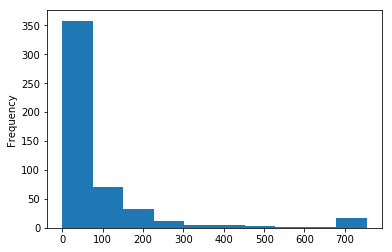

In [8]:
#Histograma dos erros:
hist_plot = quadrado_erros.plot('hist')

In [9]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(var, bias = 0):
    obs = float(len(var))
    return np.sqrt(np.sum((var - np.mean(var)) **2) / (obs - min(bias, 1)))

In [10]:
#Imprimindo o desvio padrão via fómula e via numpy
print('Resultado da função: %0.5f Resultado do numpy: %0.5f' % (calc_desvio_padrao(dataset['RM']), np.std(dataset['RM'])))

Resultado da função: 0.70192 Resultado do numpy: 0.70192


In [11]:
# Funções para calcular a variancia e a correlação
def variancia(var1, var2, bias = 0):
    obs = float(len(var1))
    return np.sum((var1 - np.mean(var1)) * (var2 - np.mean(var2))) / (obs - min(bias,1))

def padronizacao(var):
    return (var - np.mean(var)) / np.std(var)

def correlacao(var1, var2, bias = 0):
    return variancia(padronizacao(var1), padronizacao(var2), bias)

In [12]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print('Nossa estimativa de corretalação: %0.5f' % (correlacao(dataset['RM'], dataset['target'])))
print('Corretalação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0])

Nossa estimativa de corretalação: 0.69536
Corretalação a partir da função pearsonr do SciPy: 0.69536


In [13]:
# Definindo o range dos valores x e y
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

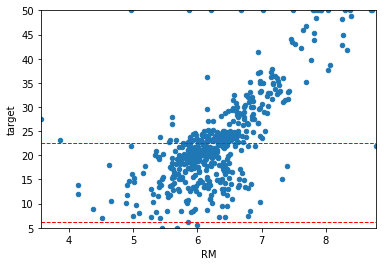

In [14]:
# Plot dos valores x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y='target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color='red', linewidth = 1)
meanX = scatter_plot.plot(x_range, [dataset['RM'].mean(),dataset['RM'].mean()], '--', color='red', linewidth = 1)

In [15]:
#Importando as funções
import statsmodels.api as sm
import statsmodels.formula.api as smf # (Simula da criação do modelo em linguagem R)

In [16]:
#Gerando X e Y. Vamos adicionar a constante ao valor de X, gerando uma matriz.
Y = dataset['target']
X = dataset['RM']

# Esse comanda adiciona os valores dos coeficientes à variável X (o bias será calculado internamente pela função)
X = sm.add_constant(X)

In [17]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [19]:
# Essa alternativa é muito similar ao código que você faria em linguagem R
modelo_v1 = smf.ols(formula = 'target ~ RM', data = dataset)
modelo_v2 = modelo_v1.fit()

In [21]:
# Criando um modelo Ordinary Least Square (outra forma de se referir a regressão linear)
modelo_v1 = sm.OLS(Y,X)
modelo_v2 = modelo_v1.fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 18 Oct 2017   Prob (F-statistic):           2.49e-74
Time:                        23:13:41   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Imprimindo os prametros
print(modelo_v2.params)

const   -34.670621
RM        9.102109
dtype: float64


In [23]:
#Gerando os valores previstos
valores_previstos = modelo_v2.predict(X)
valores_previstos

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
5      23.855940
6      20.051258
7      21.507596
8      16.583355
9      19.978442
10     23.373528
11     20.023952
12     18.931699
13     19.477826
14     20.815836
15     18.431083
16     19.350396
17     19.851012
18     14.990486
19     17.457157
20     16.028126
21     19.623459
22     21.234533
23     18.239939
24     19.250273
25     16.292087
26     18.239939
27     20.369832
28     24.447577
29     26.076855
         ...    
476    24.347454
477    13.606965
478    21.625923
479    22.026416
480    22.144743
481    26.768615
482    29.599371
483    17.775731
484    18.767861
485    22.781891
486    20.979674
487    19.077333
488    14.972282
489    14.608197
490    11.686420
491    19.787297
492    19.787297
493    17.275115
494    19.268477
495    16.938337
496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.8256

In [24]:
# Fazendo Previsões
RM = 5
Xp = np.array([1,RM])
print("Se RM = %01.f nosso modelo prevê que a mediana da tacxa de ocupação é %0.1f" % (RM, modelo_v2.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da tacxa de ocupação é 10.8


In [25]:
# Fazendo Previsões
RM = 500
Xp = np.array([1,RM])
print("Se RM = %01.f nosso modelo prevê que a mediana da tacxa de ocupação é %0.1f" % (RM, modelo_v2.predict(Xp)))

Se RM = 500 nosso modelo prevê que a mediana da tacxa de ocupação é 4516.4


In [29]:
# Fazendo Previsões
RM = 6.430
Xp = np.array([1,RM])
print("Se RM = %01.f nosso modelo prevê que a mediana da tacxa de ocupação é %0.11f" % (RM, modelo_v2.predict(Xp)))

Se RM = 6 nosso modelo prevê que a mediana da tacxa de ocupação é 23.85593997255


In [30]:
# Range de valores para X e Y
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

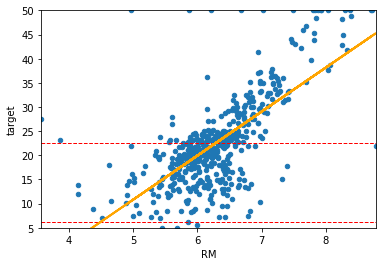

In [32]:
# Primeira camada do Sccater Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y='target', xlim = x_range, ylim = y_range)

# Segunda camada do Sccater Plot
# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color='red', linewidth = 1)
meanX = scatter_plot.plot(x_range, [dataset['RM'].mean(),dataset['RM'].mean()], '--', color='red', linewidth = 1)

# Terceira camada do Sccater Plot (linha de Regressão)
regression_line = scatter_plot.plot(dataset['RM'], valores_previstos, '-', color='orange', linewidth = 2)


In [33]:
#Comparação entre a função predict() e a função dot()
coeficientes = np.array(modelo_v2.params)
previsoes_dot = np.dot(X, coeficientes)
print('Usando a função predict(): %s ' % valores_previstos[:10])
print('Usando os coeficientes e função dot(): %s ' % previsoes_dot[:10])

Usando a função predict(): 0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64 
Usando os coeficientes e função dot(): [ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211
  23.85593997  20.05125842  21.50759586  16.5833549   19.97844155] 


In [35]:
# Gerando os residuos
residuos = dataset['target'] - valores_previstos
residuos_normalizados = standardize(residuos)

NameError: name 'standardize' is not defined